In [217]:
import pandas as pd
import datetime as dt
import time
import requests
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from bs4 import BeautifulSoup    
import regex as re
import matplotlib.pyplot as plt

In [2]:
#dt.date.fromtimestamp(created)

In [3]:
#_timestamp = df["created_utc"].apply(lambda x: dt.date.fromtimestamp(x)) # Ethan (from class challenge Q)

In [4]:
#def get_date(created):
#        return dt.date.fromtimestamp(created)
#_timestamp = df["created_utc"].apply(get_date)

In [5]:
def query_pushshift(subreddit, kind='submission', skip=30, times=5, 
                    subfield = ['title', 'selftext', 'subreddit', 'created_utc', 'author', 'num_comments', 
                                'score', 'is_self'],
                    comfields = ['body', 'score', 'created_utc']):
    stem = "https://api.pushshift.io/reddit/search/{}/?subreddit={}&size=500".format(kind, subreddit)
    mylist = []
    for x in range(1, times + 1):
        URL = "{}&after={}d".format(stem, skip * x)
        print(URL)
        response = requests.get(URL)
        assert response.status_code == 200
        mine = response.json()['data']
        df = pd.DataFrame.from_dict(mine)
        mylist.append(df)
        #changed to 3
        time.sleep(3)
    full = pd.concat(mylist, sort=False)
    if kind == "submission":
        full = full[subfield]
        full = full.drop_duplicates()
        full = full.loc[full['is_self'] == True]
    def get_date(created):
        return dt.date.fromtimestamp(created)
    _timestamp = full["created_utc"].apply(get_date)
    full['timestamp'] = _timestamp
    print(full.shape)
    return full 

In [6]:
sub_1_query = query_pushshift('dadjokes')

https://api.pushshift.io/reddit/search/submission/?subreddit=dadjokes&size=500&after=30d
https://api.pushshift.io/reddit/search/submission/?subreddit=dadjokes&size=500&after=60d
https://api.pushshift.io/reddit/search/submission/?subreddit=dadjokes&size=500&after=90d
https://api.pushshift.io/reddit/search/submission/?subreddit=dadjokes&size=500&after=120d
https://api.pushshift.io/reddit/search/submission/?subreddit=dadjokes&size=500&after=150d
(2485, 9)


In [7]:
sub_2_query = query_pushshift('jokes')

https://api.pushshift.io/reddit/search/submission/?subreddit=jokes&size=500&after=30d
https://api.pushshift.io/reddit/search/submission/?subreddit=jokes&size=500&after=60d
https://api.pushshift.io/reddit/search/submission/?subreddit=jokes&size=500&after=90d
https://api.pushshift.io/reddit/search/submission/?subreddit=jokes&size=500&after=120d
https://api.pushshift.io/reddit/search/submission/?subreddit=jokes&size=500&after=150d
(2494, 9)


In [8]:
sub_1_query.to_csv('~/documents/ga/projects/project_3/dadjokes', index=True) #whats index here
sub_2_query.to_csv('~/documents/ga/projects/project_3/jokes', index=True) #whats index here


In [92]:
query_1 = pd.read_csv('~/documents/ga/projects/project_3/dadjokes')
query_2 = pd.read_csv('~/documents/ga/projects/project_3/jokes')

In [93]:
query_1.head(10)

,Unnamed: 0,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,0,What happened to this subreddit?,I haven’t seen any posts on here since last ye...,dadjokes,1577810202,Thatusernameisntgood,3,1,True,2019-12-31
1,1,Here is my Top 10 list of favorite years from ...,(In chronological order)\n\n2010\n2011\n2012\n...,dadjokes,1577810229,drigana,0,1,True,2019-12-31
2,2,Don't go outside tonight.,If you do you won't be back be for the end of ...,dadjokes,1577810264,tvdb2003,0,1,True,2019-12-31
3,3,How do you know that someone is a seascape pai...,He uses akrill paint,dadjokes,1577810594,MrZxAlan,1,1,True,2019-12-31
4,4,Did you hear about the man who was arrested fo...,[removed],dadjokes,1577810864,Seitanic_Ritual,1,1,True,2019-12-31
5,5,Don't kiss after midnight,It's not proper to kiss on a first date!,dadjokes,1577811244,itsmrmarlboroman2u,4,2,True,2019-12-31
6,6,How to make a dad curious right before new year?,I'll tell you next decade.,dadjokes,1577811378,PapaStalinSP,0,1,True,2019-12-31
7,7,Foresight,is 2020,dadjokes,1577811403,RonWisely,0,2,True,2019-12-31
8,8,What do you call two monkeys sharing an amazon...,Prime-mates,dadjokes,1577811607,SebastianLi1,1,1,True,2019-12-31
9,9,Australians can see into the future right now,[removed],dadjokes,1577811619,FertileProgram,5,1,True,2019-12-31


In [94]:
#is_self , 

In [95]:
query_2.head(10)

,Unnamed: 0,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,0,Visions for the new year,Son: Hey dad! What are your visions for the up...,Jokes,1577810155,SotongBoi,1,1,True,2019-12-31
1,1,I wrote a book about basements,I am hoping it makes the best cellars list,Jokes,1577810539,Bonsacked,0,3,True,2019-12-31
2,2,I can see so clearly that my doctor says that ...,My vision is 2020,Jokes,1577810548,SilenceoftheSamz,0,0,True,2019-12-31
3,3,I was once flying with this guy named Jack..,I greeted him then suddenly everyone got scared.,Jokes,1577810619,ImWasil,0,1,True,2019-12-31
4,4,I just took my last dump of the year,"2019 could end or not, I have no shits left to...",Jokes,1577810740,reverendrambo,0,3,True,2019-12-31
5,5,Been on earth for 16 years,and I still didn’t find any checkpoints to sav...,Jokes,1577810824,BoBbiSm,5,0,True,2019-12-31
6,6,Everyone keeps asking me what I will be doing ...,I told them I will be sleeping.\n\n&amp;#x200B...,Jokes,1577811027,Stockengineer,0,1,True,2019-12-31
7,7,I bought a high-def TV today,It’s my new year’s resolution,Jokes,1577811065,NicholasHomann,2,1,True,2019-12-31
8,8,My friend asked me where I see myself tomorrow,[removed],Jokes,1577811210,Redditisjusthorrible,0,1,True,2019-12-31
9,9,Just saw an interview with Meatloafs ex-wife ....,[removed],Jokes,1577811279,Mycarsold,0,1,True,2019-12-31


In [151]:
query_2.loc[6, 'selftext']

'I told them I will be sleeping.\n\n&amp;#x200B;\n\n In hindsight, it will be 2020.'

In [96]:
query_all = query_1.append(query_2, ignore_index=True)

In [97]:
#checks the dataframe size to confirm append
print(query_1.shape)
print(query_2.shape)
print(query_all.shape)

(2485, 10)
(2494, 10)
(4979, 10)


In [98]:
# Check for null values in combined dataframe
query_all.isnull().sum()

Unnamed: 0        0
title             0
selftext        178
subreddit         0
created_utc       0
author            0
num_comments      0
score             0
is_self           0
timestamp         0
dtype: int64

In [99]:
# Replace null texts with empty string
query_all.selftext.fillna(value='', inplace=True)

In [182]:

# #checking [removed] in our df
# (query_all[(query_all['selftext']=='[removed]')]['selftext']).value_counts()
# #using applymap lambda replacing [removed] with ' '
# query_all=query_all.applymap(lambda x: x.replace('[removed]', ' '))
query_all['selftext'] = ['' if post == '[removed]' else post for post in query_all['selftext']]

In [183]:
#combine the title and text in the thread to be used as the feature
query_all['words'] = query_all['title'] + query_all['selftext']

In [184]:
query_all['words']

0       What happened to this subreddit?I haven’t seen...
1       Here is my Top 10 list of favorite years from ...
2       Don't go outside tonight.If you do you won't b...
3       How do you know that someone is a seascape pai...
4       Did you hear about the man who was arrested fo...
                              ...                        
4974    You're being strapped into the electric chair....
4975    I didn’t do very well at school. I was given a...
4976    Sometimes I get tired of people calling me "lo...
4977    What do people in Alabama call an orgy?A famil...
4978    My friend is a frequent sperm donorGet a load ...
Name: words, Length: 4979, dtype: object

In [103]:
query_all['subreddit']

0       dadjokes
1       dadjokes
2       dadjokes
3       dadjokes
4       dadjokes
          ...   
4974       Jokes
4975       Jokes
4976       Jokes
4977       Jokes
4978       Jokes
Name: subreddit, Length: 4979, dtype: object

In [104]:
query_all[query_all['words'].index == 18][['title','selftext','words']]

,title,selftext,words
18,Why do buses stand at the bus stand?,Because they can't sit.,Why do buses stand at the bus stand?Because th...


# Pre-processing

In [22]:
lemmatizer = WordNetLemmatizer()

In [23]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+') ## We'll talk about this in a moment.

In [185]:
# convert the contents in 'words' to lowercase prior to tokenizing
query_all.words = query_all.words.str.lower()
query_all.words = query_all.words.str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()

#query_all['words'] = query_all['words'].apply(nltk.word_tokenize)
# # "Run" Tokenizer
# query_all_tokens = tokenizer.tokenize(query_all.words)

In [186]:
def clean_words(words):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    words_no_html = BeautifulSoup(words).get_text()
    
    # 2. Remove non-letters.
    words_letters = re.sub("[^a-zA-Z]", " ", words_no_html)
    
    # 3. Convert to lower case, split into individual words.
    words_lower = words_letters.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stopwords.
    words_no_stopwords = [w for w in words_lower if not w in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(words_no_stopwords))

In [187]:
# For every row of 'words', apply the above data cleaning function and reassign them back to 'words'
query_all['cleaned_words'] = query_all['words'].apply(clean_words)

In [188]:
query_all.cleaned_words.isnull().sum()

0

In [189]:
query_all['subreddit']

0       dadjokes
1       dadjokes
2       dadjokes
3       dadjokes
4       dadjokes
          ...   
4974       Jokes
4975       Jokes
4976       Jokes
4977       Jokes
4978       Jokes
Name: subreddit, Length: 4979, dtype: object

In [236]:
cvec = CountVectorizer(stop_words = 'english', ngram_range=(2,2))
cvec_dadjokes = cvec.fit_transform(query_all.loc[query_all['subreddit'] == 'dadjokes','cleaned_words'])
cvec_dadjokes_df = pd.DataFrame(cvec_dadjokes.toarray(),
                         columns=cvec.get_feature_names())

cvec_jokes = cvec.fit_transform(query_all.loc[query_all['subreddit'] == 'Jokes','cleaned_words'])
cvec_jokes_df = pd.DataFrame(cvec_jokes.toarray(),
                         columns=cvec.get_feature_names())

cvec_all = cvec.fit_transform(query_all['cleaned_words'])
cvec_all_df = pd.DataFrame(cvec_all.toarray(),
                         columns=cvec.get_feature_names())

cvec = CountVectorizer(stop_words = 'english', ngram_range=(2,2))
cvec_dadjokes = cvec.fit_transform(query_all.loc[query_all['subreddit'] == 'dadjokes','cleaned_words'])
cvec_dadjokes_df = pd.DataFrame(cvec_dadjokes.toarray(),
                         columns=cvec.get_feature_names())

cvec_jokes = cvec.fit_transform(query_all.loc[query_all['subreddit'] == 'Jokes','cleaned_words'])
cvec_jokes_df = pd.DataFrame(cvec_jokes.toarray(),
                         columns=cvec.get_feature_names())

cvec_all = cvec.fit_transform(query_all.loc[query_all['subreddit'].isnull() == False,'cleaned_words'])
cvec_all_df = pd.DataFrame(cvec_all.toarray(),
                         columns=cvec.get_feature_names())

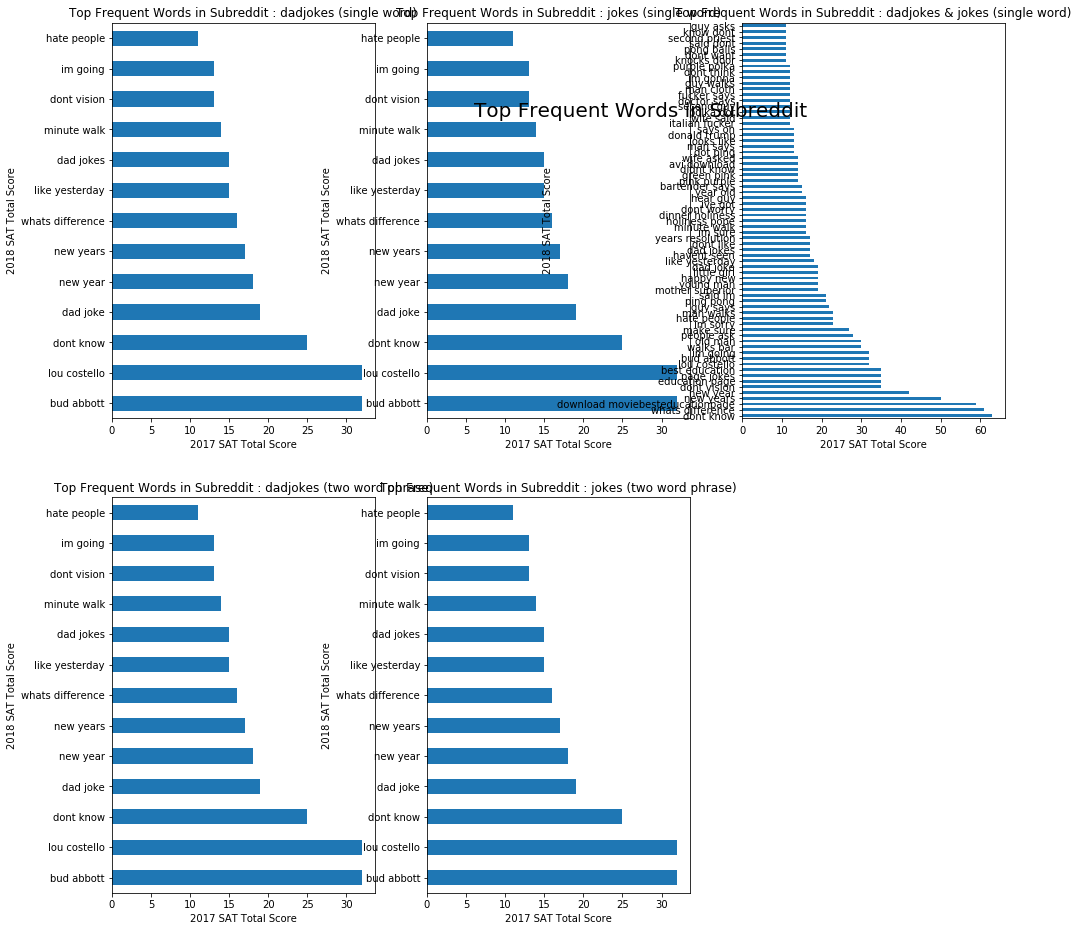

In [245]:
plt.figure(figsize = (16,16))


ax1 = plt.subplot(231)
ax1.set_title('Top Frequent Words in Subreddit : dadjokes (single word)')
ax1 = cvec_dadjokes_df.sum().sort_values(ascending = False)[cvec_dadjokes_df.sum().sort_values(ascending = False) > 10].plot(kind = 'barh');
plt.ylabel("2018 SAT Total Score", fontsize = 10)
plt.xlabel("2017 SAT Total Score", fontsize = 10);

ax2 = plt.subplot(232)
ax2.set_title('Top Frequent Words in Subreddit : jokes (single word)')
ax2 = cvec_dadjokes_df.sum().sort_values(ascending = False)[cvec_dadjokes_df.sum().sort_values(ascending = False) > 10].plot(kind = 'barh');
plt.ylabel("2018 SAT Total Score", fontsize = 10)
plt.xlabel("2017 SAT Total Score", fontsize = 10);

ax2 = plt.subplot(233)
ax2.set_title('Top Frequent Words in Subreddit : dadjokes & jokes (single word)')
ax2 = cvec_all_df.sum().sort_values(ascending = False)[cvec_all_df.sum().sort_values(ascending = False) > 10].plot(kind = 'barh');
plt.ylabel("2018 SAT Total Score", fontsize = 10)
plt.xlabel("2017 SAT Total Score", fontsize = 10);

ax1 = plt.subplot(234)
ax1.set_title('Top Frequent Words in Subreddit : dadjokes (two word phrase)')
ax1 = cvec_dadjokes_df.sum().sort_values(ascending = False)[cvec_dadjokes_df.sum().sort_values(ascending = False) > 10].plot(kind = 'barh');
plt.ylabel("2018 SAT Total Score", fontsize = 10)
plt.xlabel("2017 SAT Total Score", fontsize = 10);

ax2 = plt.subplot(235)
ax2.set_title('Top Frequent Words in Subreddit : jokes (two word phrase)')
ax2 = cvec_dadjokes_df.sum().sort_values(ascending = False)[cvec_dadjokes_df.sum().sort_values(ascending = False) > 10].plot(kind = 'barh');
plt.ylabel("2018 SAT Total Score", fontsize = 10)
plt.xlabel("2017 SAT Total Score", fontsize = 10);

plt.text(6,25,'Top Frequent Words in Subreddit',fontsize=20);
#cvec_dadjokes_df.sum().sort_values(ascending = False)[cvec_dadjokes_df.sum().sort_values(ascending = False) > 10].plot(kind = 'barh')

# Modeling

In [234]:
X = query_all['cleaned_words']
y = query_all['subreddit']

In [161]:
# STRATIFY?
#train test split on the combined data (create two copies separately for cvec,tvec)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42)


In [162]:
print(X_train.shape)
print(X_test.shape)

(3335,)
(1644,)


In [163]:
# Instantiate CountVectorizer, TfidfVectorizer
cvec = CountVectorizer()
tvec = TfidfVectorizer()


# #fit and transform
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

X_train_tvec = tvec.fit_transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [164]:
# Fit logistic regression on cvec data
logreg = LogisticRegression()
logreg.fit(X_train_cvec, y_train)

C:\Users\YOU-Family\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
logreg.score(X_train_cvec, y_train)

0.9556221889055472

In [166]:
logreg.score(X_test_cvec, y_test)

0.6356447688564477

In [167]:
# Fit logistic regression on tvec data
logreg = LogisticRegression()
logreg.fit(X_train_tvec, y_train)
logreg.score(X_train_tvec, y_train)

0.8986506746626687

In [168]:
logreg.score(X_test_tvec, y_test)

0.6240875912408759

In [140]:
# transform the training set
X_train_cvec = cvec.transform(X_train)
X_train_cvec = pd.DataFrame(X_train.toarray(),
                         columns=cvec.get_feature_names())


X_train_tvec = tvec.transform(X_train)
X_train_tvec = pd.DataFrame(X_train.toarray(),
                         columns=tvec.get_feature_names())



AttributeError: 'Series' object has no attribute 'toarray'

In [73]:
#Transform the test set

X_test_cvec = cvec.transform(X_test_cvec)
X_test_cvec = pd.DataFrame(X_test_cvec.toarray(),
                         columns=cvec.get_feature_names())

X_test_tvec = tvec.transform(X_test_tvec)
X_test_tvec = pd.DataFrame(X_test_tvec.toarray(),
                         columns=tvec.get_feature_names())


In [170]:
pd.DataFrame(X_test_cvec.toarray(),
                         columns=cvec.get_feature_names()).sum()

aaaaaaa    0
aaaand     0
aac        3
aaf        0
ab         0
          ..
zoo        3
zoomer     0
zpgcrsg    0
zwuuas     0
zy         0
Length: 9831, dtype: int64

In [47]:
# Instantiate logistic regression.
lr_cvec = LogisticRegression()
lr_tvec = LogisticRegression()

# Fit logistic regression.
lr_cvec.fit(X_train_cvec, y_train_cvec)
lr_tvec.fit(X_train_tvec, y_train_tvec)

# Evaluate logistic regression.
print(f'CountVectorizer Training Score: {lr_cvec.score(X_train_cvec, y_train_cvec)}')
print(f'CountVectorizer Testing Score: {lr_cvec.score(X_test_cvec, y_test_cvec)}')
print(f'TfidfVectorizer Training Score: {lr_tvec.score(X_train_tvec, y_train_tvec)}')
print(f'TfidfVectorizer Testing Score: {lr_tvec.score(X_test_tvec, y_test_tvec)}')

C:\Users\YOU-Family\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\YOU-Family\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CountVectorizer Training Score: 0.9691154422788606
CountVectorizer Testing Score: 0.6210462287104623
TfidfVectorizer Training Score: 0.9226386806596701
TfidfVectorizer Testing Score: 0.6313868613138686


In [48]:
#stop_words = set(stopwords.words('english'))

In [49]:
# #create words filtered 

# for w in words:
#     if w not in stopWords:
#         wordsFiltered.append(w)

NameError: name 'words' is not defined

In [ ]:
# metrics matrix